In [1]:
##importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [ ]:
#importing dataset
from google.colab import  files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
#loading dataset to dataframe
df=pd.read_csv("Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
## checking for missing values
df.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


No missing values is present in this dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
##Statistical summary
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 📌 Observations

The dataset contains the following columns:

### CustomerID
- Used only as a unique identifier.
- Not relevant for clustering and will be removed before modeling.

### Age
- **Mean:** 38.85 years  
- **Standard Deviation:** 13.97  
- **Range:** 18 to 70 years  
- Indicates a diverse age distribution among customers.

### Annual Income (in thousand dollars)
- **Mean:** 60.56 k$  
- **Standard Deviation:** 26.26  
- **Range:** 15 to 137  
- Shows a wide variation in customer income levels.

### Spending Score (1–100)
- **Mean:** 50.20  
- **Standard Deviation:** 25.82  
- **Range:** 1 to 99  
- Reflects significant variation in customer spending behavior.

### Key Observations
- No missing values across numerical features.
- Features exist on different scales, making **feature scaling necessary** before applying K-Means.
- **Annual Income** and **Spending Score** are strong candidates for customer segmentation and will be used for clustering.


In [ ]:
# Dropping CustomerID
df = df.drop('CustomerID', axis=1)


In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
##selecting relevant features  for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]


array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

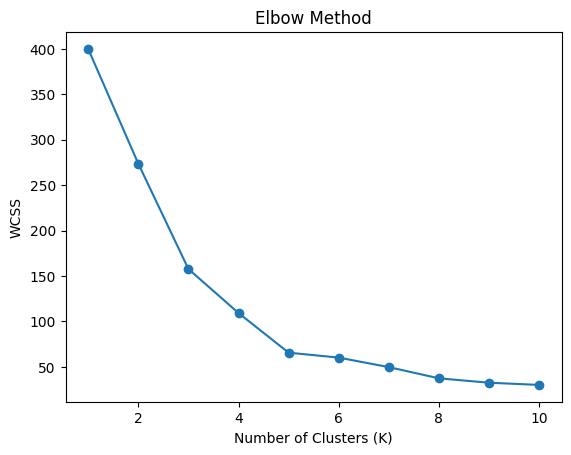

In [ ]:
##Finding the optimal number of clusters by elbow method


wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()



##  Elbow Method for Optimal Number of Clusters

To determine the optimal number of clusters for K-Means, the **Elbow Method** was applied using the **Within-Cluster Sum of Squares (WCSS)** metric.

### Observations from the Elbow Plot
- WCSS decreases sharply as the number of clusters increases from **K = 1 to K = 5**.
- After **K = 5**, the rate of decrease in WCSS slows down significantly.
- This point represents the “elbow,” where adding more clusters yields diminishing returns.

### Optimal Number of Clusters
- **K = 5** is selected as the optimal number of clusters.
- It provides a good balance between:
  - Model simplicity
  - Compact and well-separated clusters

### Conclusion
Based on the Elbow Method, using **5 clusters** is appropriate for segmenting customers in this dataset and will be used for subsequent K-Means clustering.


In [ ]:
##applying k means with optimal k
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters


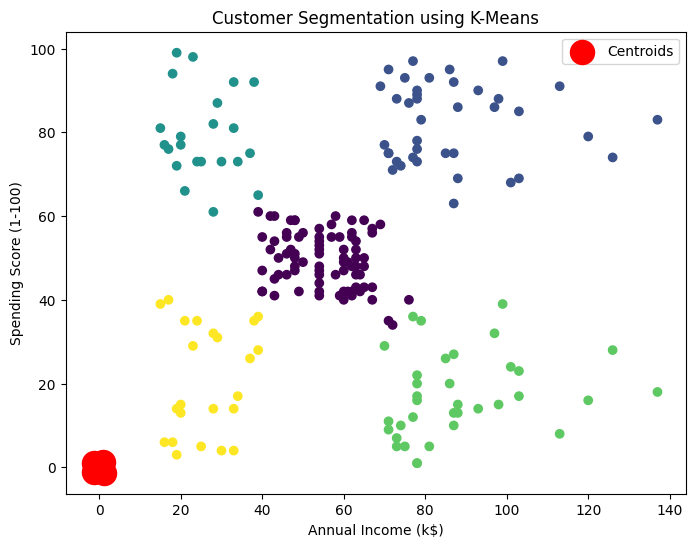

In [ ]:
#visualizing the cluster
plt.figure(figsize=(8,6))
plt.scatter(
    X.iloc[:, 0],
    X.iloc[:, 1],
    c=clusters,
    cmap='viridis'
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c='red',
    label='Centroids'
)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.show()


## 📊 Cluster Interpretation and Business Insights

Based on the K-Means clustering results (K = 5), customers have been grouped into five distinct segments using **Annual Income** and **Spending Score**. Each cluster represents a specific customer behavior pattern and provides meaningful business insights.

---

### 🔵 Cluster 0 – High Income, High Spending Customers
Customers in this cluster have **high annual income** and **high spending scores**.  
They are the most valuable segment for the business.

**Business Strategy:**  
Focus on retention strategies such as premium memberships, loyalty programs, and exclusive offers.

---

### 🟣 Cluster 1 – Average Income, Average Spending Customers
This group represents customers with **moderate income and moderate spending habits**.  
They form a stable and consistent customer base.

**Business Strategy:**  
Use targeted promotions, personalized recommendations, and seasonal offers to increase engagement.

---

### 🟡 Cluster 2 – Low Income, Low Spending Customers
Customers in this cluster have **limited purchasing power** and low spending behavior.

**Business Strategy:**  
Offer budget-friendly products and cost-effective promotions to maintain engagement.

---

### 🟢 Cluster 3 – High Income, Low Spending Customers
These customers earn well but tend to **spend conservatively**.

**Business Strategy:**  
Encourage higher spending through loyalty rewards, personalized discounts, and premium product exposure.

---

### 🔵 Cluster 4 – Low Income, High Spending Customers
This group shows **high spending despite lower income**, indicating impulsive or trend-driven behavior.

**Business Strategy:**  
Target with limited-time offers, promotional campaigns, and controlled credit incentives.

---



📊 Silhouette Score – Model Evaluation
🔍 Why Silhouette Score is Needed

While the Elbow Method helps estimate the optimal number of clusters, it does not measure the quality of clustering.
The Silhouette Score provides a quantitative way to evaluate how well each data point fits within its assigned cluster compared to other clusters.

In simple terms, it tells us:

How well-separated the clusters are

How cohesive the points inside each cluster are

This makes it an important metric for validating the effectiveness of the K-Means model.

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)

print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.5547


##  Silhouette Score Analysis

The calculated **Silhouette Score = 0.5547**, which indicates a **good quality clustering result**.

###  Interpretation of the Score


With a score of **0.5547**, the model demonstrates:
- **Good separation between clusters**
- **Strong internal cohesion** within each cluster
- **Minimal overlap** among different customer groups

---

###  What This Means for the Project

- The selected value of **K = 5** is **well-justified** and effective.
- Customers are meaningfully segmented based on their spending behavior.
- The clustering output is reliable enough for **business decision-making**.

---

### ✅ Conclusion

The Silhouette Score confirms that the K-Means model has successfully identified distinct and meaningful customer segments.  
This validates the clustering approach and supports using these segments for targeted marketing and strategic planning.

---

*Overall, the model demonstrates strong clustering performance and provides actionable insights.*
